In [2]:
import pandas as pd

arquivo = pd.read_csv("Dados.csv")

display(arquivo.head(2))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE


In [3]:
df = pd.DataFrame(arquivo)

regiao = df[df['REGIAO'] == 'SUDESTE']

cursos = regiao[["NOME_CURSO", "MODALIDADE", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "MODALIDADE", "REGIAO"]).sum()

cursos_ativos = cursos.query('QT_VAGAS_AUTORIZADAS != 0')

display(cursos_ativos)

cursos_ativos.to_excel('modalidade_SUDESTE.xlsx')

QT_VAGAS_AUTORIZADAS
NOME_CURSO                                         MODALIDADE           REGIAO                       
ABI - ARTES VISUAIS                                Educação Presencial  SUDESTE                     1
ABI - CIÊNCIAS BIOLÓGICAS                          Educação Presencial  SUDESTE                    82
ABI - CIÊNCIAS DA ATIVIDADE FÍSICA                 Educação Presencial  SUDESTE                    60
ABI - CIÊNCIAS DA NATUREZA                         Educação Presencial  SUDESTE                    40
ABI - CIÊNCIAS DA NATUREZA: CIÊNCIAS E BIOLOGIA... Educação Presencial  SUDESTE                    80
...                                                                                               ...
WEB DESIGN E INTERNET                              Educação Presencial  SUDESTE                   200
ZOOTECNIA                                          Educação Presencial  SUDESTE                  3696
                                                   Educação a Distância SUDESTE                 16900
ÓPTICA E OPTOMETRIA                                Educação Presencial  SUDESTE                   320
                                                   Educação a Distância SUDESTE                184650

[1705 rows x 1 columns]

In [4]:
df2 = pd.DataFrame(arquivo)

cidade = df2[df2['REGIAO'] == 'SUDESTE']

ensino_sudeste = cidade[["MODALIDADE", "QT_VAGAS_AUTORIZADAS"]].groupby("MODALIDADE").sum()

display(ensino_sudeste)

ensino_sudeste.to_excel("modalidade2_sudeste.xlsx")

,QT_VAGAS_AUTORIZADAS
MODALIDADE,
Educação Presencial,4347355
Educação a Distância,2328680872


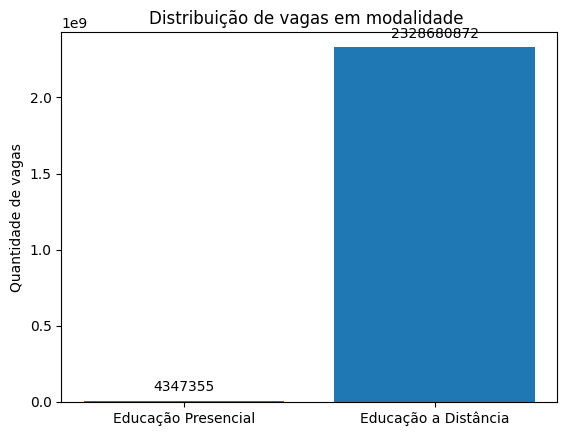

In [9]:
import matplotlib.pyplot as plt

arquivo2 = pd.read_excel("modalidade2_sudeste.xlsx")

tipo_facu = arquivo2['MODALIDADE']
qtd_vagas = arquivo2['QT_VAGAS_AUTORIZADAS']

qtd_vagas_rounded = [round(value) for value in qtd_vagas]

rec = plt.bar(tipo_facu, qtd_vagas)
plt.bar_label(rec, labels=qtd_vagas_rounded, padding=5, fmt="%1.0f%%")

posicoes = [0, 1]
labels_personalizadas = ['Educação Presencial', 'Educação a Distância']

plt.xticks(posicoes, labels_personalizadas)
plt.ylim(0, 2428680872)

plt.ylabel('Quantidade de vagas')
plt.title('Distribuição de vagas em modalidade ')

plt.savefig('grafico-03.png', bbox_inches='tight')

plt.show()